## Notebook for generating distribution of lemma ranks across levels

In [1]:
from collections import defaultdict
from features import feature_pipeline
from utils import read_corpus
import altair as alt
import pandas as pd
alt.renderers.enable('mimetype')
import plotly.io as pio
pio.renderers.default = "plotly_mimetype"

In [7]:
# Read in corpus
corpus = read_corpus()

In [3]:
# Set up feature pipeline
pipe = feature_pipeline()

In [4]:
# Extract average lemma ranks for each text in each level
feature_dict = defaultdict(list)
for level, dicts in corpus.items():
    for i, text_item in enumerate(dicts):
        # Compute average lemma rank
        feature_dict["avg_lemma_rank"].append(pipe.avg_word_freq(text_item["content"]))
        feature_dict["level"].append(level)

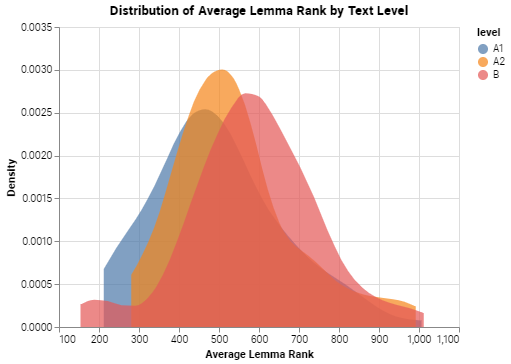

In [5]:
# Convert dict to dataframe
feature_df = pd.DataFrame(feature_dict)

# Plot distribution of average lemma rank
alt.Chart(
    feature_df, title="Distribution of Average Lemma Rank by Text Level"
).transform_density(
    "avg_lemma_rank", groupby=["level"], as_=["avg_lemma_rank", "density"]
).mark_area(
    interpolate="monotone", opacity=0.7
).encode(
    x=alt.X("avg_lemma_rank", title="Average Lemma Rank"),
    y=alt.Y("density:Q", title="Density"),
    color="level",
)